In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [71]:
car_price = pd.read_csv(r"C:\Users\Lenovo\Downloads\CAR DETAILS FROM CAR DEKHO.csv")

In [72]:
car_price.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [73]:
car_price.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [74]:
car_price.shape

(4340, 8)

In [75]:
car_price.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [76]:
car_price.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [77]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [78]:
print(car_price.fuel.value_counts())
print(car_price.seller_type.value_counts())
print(car_price.transmission.value_counts())
print(car_price.owner.value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
Manual       3892
Automatic     448
Name: transmission, dtype: int64
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


In [79]:
car_price.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
car_price.replace({'seller_type':{'Individual':1,'Dealer':2,'Trustmark Dealer':0}},inplace=True)
car_price.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
car_price.replace({'owner':{'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':0}},inplace=True)

In [80]:
car_price.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,1,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,1,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,1,0,1
3,Datsun RediGO T Option,2017,250000,46000,1,1,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,1,0,2


In [81]:
x = car_price.drop(['name','selling_price'],axis=1)
y = car_price['selling_price']
print(x)
print(y)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     1            1             0      1
1     2007      50000     1            1             0      1
2     2012     100000     0            1             0      1
3     2017      46000     1            1             0      1
4     2014     141000     0            1             0      2
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     0            1             0      2
4336  2014      80000     0            1             0      2
4337  2009      83000     1            1             0      2
4338  2016      90000     0            1             0      1
4339  2016      40000     1            1             0      1

[4340 rows x 6 columns]
0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [85]:
# ModelTraining - 1.Linear Regression
lr_model=LinearRegression()

In [88]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [89]:
# Model Evaluation
training_prediction = lr_model.predict(x_train)

In [90]:
# R squared Error
error_score = metrics.r2_score(y_train,training_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.43895600251170874


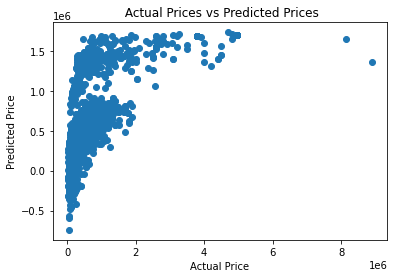

In [93]:
# Visualize the actual & Predicted data
plt.scatter(y_train, training_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [96]:
test_prediction = lr_model.predict(x_test)
error_score =metrics.r2_score(y_test, test_prediction)
print('R squared error : ',error_score)

R squared error :  0.5138979985796799


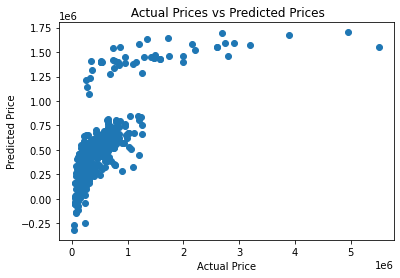

In [97]:
plt.scatter(y_test, test_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [98]:
# 2.Lasso Regression
lasso_model = Lasso()
lasso_model.fit(x_train,y_train)

Lasso()

In [100]:
# Model Evaluation
training_prediction = lasso_model.predict(x_train)
error_score = metrics.r2_score(y_train, training_prediction)
print("R squared error : ", error_score)

R squared error :  0.438956002457603


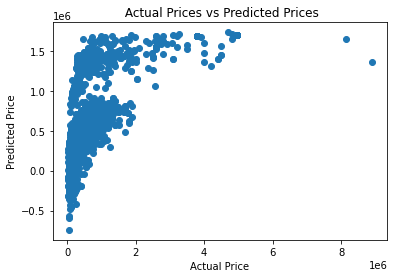

In [105]:
plt.scatter(y_train, training_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [104]:
test_prediction = lasso_model.predict(x_test)
error_score = metrics.r2_score(y_test, test_prediction)
print("R squared error : ",error_score)

R squared error :  0.5138974317354799


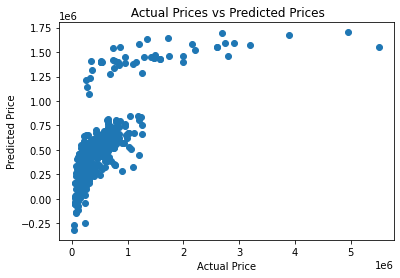

In [107]:
plt.scatter(y_test, test_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()